## 2.- Implementa modelos de regresión para entender impacto de variables explicativas en el churn usando (E Commerce Dataset), explica tus conclusiones sobre el impacto de las variables de acuerdo con el desempeño del mejor modelo implementado

In [1]:
import pandas as pd # Cargamos las librerias que vamos a necesitar
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Leemos los datos y los mostramos
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm') 
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## Dividimos los datos en prueba y entrenamiento

In [3]:
X = df.iloc[:,2:] # Quitamos la variable Churn y el CustomerID
y = df['Churn'] # Tomamos la variable Churn

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

## Checar datos atípicos

Hacemos un describe de los datos y vemos cuáles tiene datos muy diferentes al resto, después para analizar cada variable por separado

In [5]:
X_train.describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,4290.000000,4504.000000,4308.000000,4308.000000,4504.000000,4504.000000,4504.000000,4504.000000,4290.000000,4301.000000,4297.000000,4262.000000,4504.000000
mean,10.224009,1.654529,15.618849,2.937094,3.687833,3.055062,4.220471,0.289742,15.701166,1.733085,2.974168,4.534725,177.464196
std,8.552224,0.914809,8.555696,0.723411,1.020672,1.385207,2.583454,0.453693,3.665511,1.865200,2.925922,3.662555,49.319792
min,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.860000
50%,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.470000
75%,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.700000
max,51.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


Se puede ver que hay datos atípicos en varias variables, por ejemplo Tenure, WarehouseToHome, NumberOfAddress, CashbackAmount

In [6]:
# Aquí vamos a poner los ìndices de los renglones que vamos a quitar
index_rm = []

### Tenure

<Axes: >

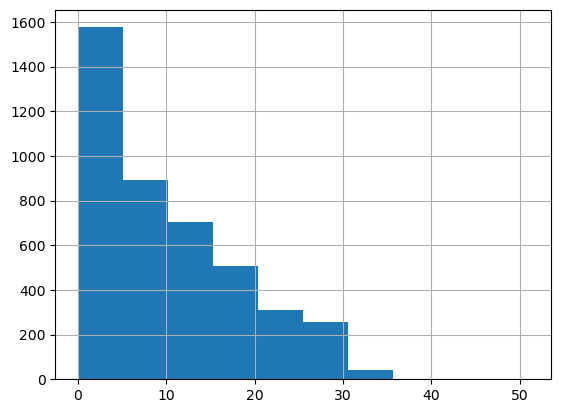

In [7]:
X_train['Tenure'].hist()

In [8]:
max_ter = 31
print(f"Aqui observamos {sum(X_train['Tenure']>max_ter)} valores mayores a {max_ter} que se podrían considerar atípicos")
X_train_ter = X_train[X_train['Tenure']>max_ter]
X_train_ter

Aqui observamos 2 valores mayores a 31 que se podrían considerar atípicos


,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3743,51.0,Mobile Phone,1,7.0,Debit Card,Male,4.0,2,Laptop & Accessory,3,Divorced,2,0,25.0,2.0,3.0,9.0,174.0
928,50.0,Phone,1,6.0,Debit Card,Male,3.0,1,Laptop & Accessory,3,Divorced,1,0,24.0,1.0,2.0,8.0,149.0


### WarehouseToHome

<Axes: >

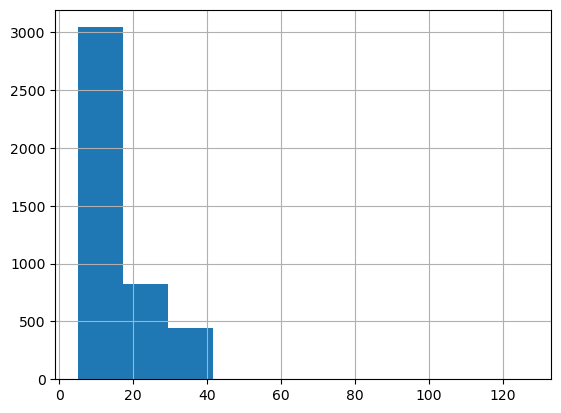

In [9]:
X_train['WarehouseToHome'].hist()

In [10]:
max_wth = 36
print(f"Aqui observamos {sum(X_train['WarehouseToHome']>max_wth)} valores mayores a {max_wth} que se podrían considerar atípicos")
X_train_wth = X_train[X_train['WarehouseToHome']>max_wth]
X_train_wth

Aqui observamos 2 valores mayores a 36 que se podrían considerar atípicos


,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1309,25.0,Computer,3,126.0,Debit Card,Male,2.0,3,Mobile,1,Married,3,0,15.0,1.0,1.0,0.0,134.82
4124,26.0,Computer,3,127.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,4,0,16.0,2.0,2.0,1.0,159.82


### NumberOfAddress

<Axes: >

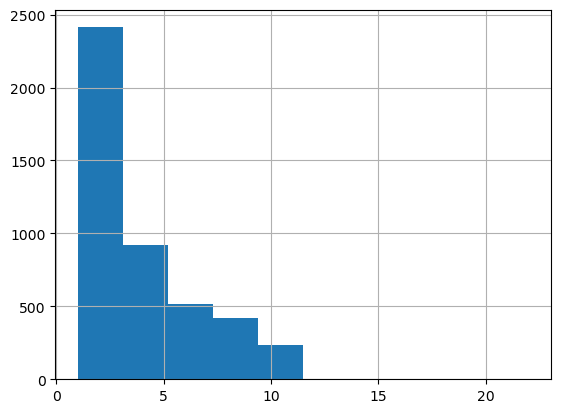

In [11]:
X_train['NumberOfAddress'].hist()

In [12]:
max_nof = 11
print(f"Aqui observamos {sum(X_train['NumberOfAddress']>max_nof)} valores mayores a {max_nof} que se podrían considerar atípicos")
X_train_nof = X_train[X_train['NumberOfAddress']>max_nof]
X_train_nof

Aqui observamos 3 valores mayores a 11 que se podrían considerar atípicos


,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
691,12.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Single,21,0,15.0,1.0,1.0,3.0,167.82
3506,13.0,Computer,1,16.0,Debit Card,Male,4.0,4,Laptop & Accessory,4,Single,22,0,16.0,2.0,2.0,4.0,192.82
260,NaN,Computer,1,10.0,COD,Male,2.0,3,Mobile,2,Single,19,1,23.0,1.0,1.0,0.0,122.85


### CashbackAmount

<Axes: >

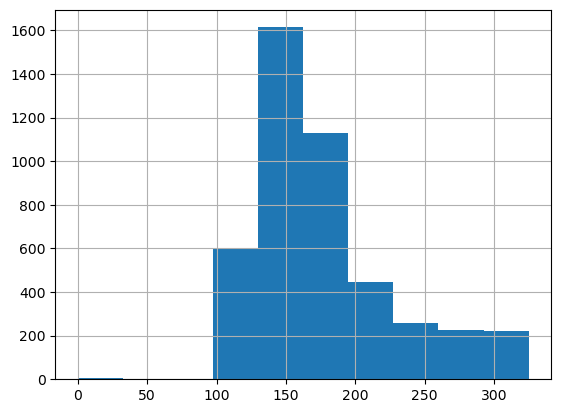

In [13]:
X_train['CashbackAmount'].hist()

In [14]:
max_ca = 100
print(f"Aqui observamos {sum(X_train['CashbackAmount']<max_ca)} valores menores a {max_ca} que se podrían considerar atípicos")
X_train_ca = X_train[X_train['CashbackAmount']<max_ca]
X_train_ca

Aqui observamos 8 valores menores a 100 que se podrían considerar atípicos


,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1255,8.0,Mobile Phone,3,24.0,Credit Card,Male,3.0,3,Laptop & Accessory,5,Married,1,0,16.0,0.0,1.0,4.0,0.0
1026,1.0,Mobile Phone,1,33.0,Credit Card,Female,2.0,5,Laptop & Accessory,5,Married,1,0,21.0,1.0,1.0,0.0,0.0
1850,0.0,Mobile Phone,1,12.0,Debit Card,Female,3.0,3,Mobile Phone,1,Married,2,1,13.0,0.0,1.0,2.0,56.0
2916,11.0,Computer,3,11.0,E wallet,Male,3.0,4,Mobile Phone,2,Married,6,0,18.0,2.0,6.0,9.0,25.0
4115,7.0,Mobile Phone,1,22.0,Credit Card,Female,4.0,4,Laptop & Accessory,1,Married,2,1,14.0,6.0,9.0,2.0,37.0
3841,2.0,Mobile Phone,1,34.0,Credit Card,Female,3.0,6,Laptop & Accessory,5,Married,2,0,22.0,2.0,2.0,1.0,25.0
4665,1.0,Mobile Phone,1,13.0,Debit Card,Female,4.0,4,Mobile Phone,1,Married,3,1,14.0,1.0,2.0,3.0,81.0
4070,9.0,Mobile Phone,3,25.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Married,2,0,17.0,1.0,2.0,5.0,25.0


In [15]:
# Unimos todos los indices para poder borrarlos
index_rm = index_rm + X_train_ter.index.tolist() + X_train_wth.index.tolist() + X_train_ca.index.tolist() + X_train_nof.index.tolist()

In [16]:
# Quitamos los datos atípicos, debido a que no son muchos
X_train_rm = X_train.drop(index_rm)
y_train_rm = y_train.drop(index_rm)

## Datos faltantes e imputación

Checamos si datos faltantes, y se decidió hacer una imputación de los datos

In [17]:
# Buscar que variables son NaN
columns_NaN,types = [],[]
for i in X_train_rm.columns:
    if X_train_rm[i].isna().any():
        columns_NaN.append(i)
        types.append(X_train_rm[i].dtype)
print(columns_NaN)
print(types)

['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


Aquí podemos ver que todas las variables que tiene NaN son de tipo flotante, entonces podríamos hacer la imputación de datos mediante la media o la varianza

In [18]:
X_train_rm[columns_NaN].mean() # Obtenemos la media de las columnas

Tenure                         10.206969
WarehouseToHome                15.561379
HourSpendOnApp                  2.936408
OrderAmountHikeFromlastYear    15.693333
CouponUsed                      1.733784
OrderCount                      2.976179
DaySinceLastOrder               4.538733
dtype: float64

In [19]:
X_train_rm_mode = X_train_rm[columns_NaN].mode() # Obtenemos la moda de las columnas
X_train_rm_mode

,Tenure,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder
0,1.0,9.0,3.0,14.0,1.0,2.0,3.0


array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'WarehouseToHome'}>,
        <Axes: title={'center': 'HourSpendOnApp'}>],
       [<Axes: title={'center': 'OrderAmountHikeFromlastYear'}>,
        <Axes: title={'center': 'CouponUsed'}>,
        <Axes: title={'center': 'OrderCount'}>],
       [<Axes: title={'center': 'DaySinceLastOrder'}>, <Axes: >,
        <Axes: >]], dtype=object)

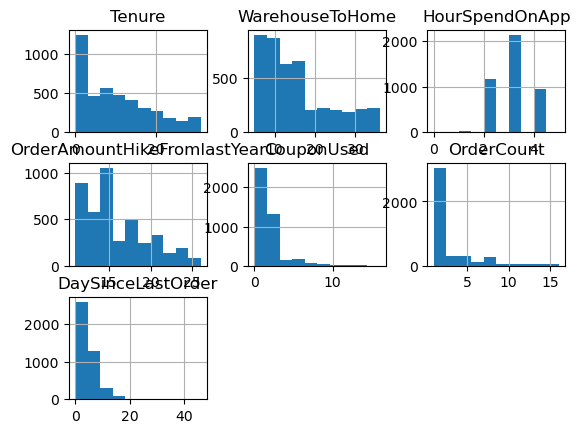

In [20]:
X_train_rm[columns_NaN].hist() # Histograma de las columnas con datos faltantes

Podemos ver que para para la variable Tenure y WarehouseToHome la diferencia de los valores para la media y la varianza son grandes a comparación de las otras variables, por lo cual se podrían hacer varias cosas. Por simplicidad se va a usar la moda para la imputación de datos, ya que las variables son enteros y la media da valores con decimal

In [21]:
# Imputamos los datos con la moda
for i in columns_NaN:
    X_train_rm[i].fillna(X_train_rm_mode[i][0], inplace=True)

## Datos categóricos 

Checamos que columnas son datos categóricos y se hace one-hot enconder para poder usar los modelos sobre los datos

In [22]:
# Checamos que columnas son datos categóricos
columns_strin = []
for i in X_train_rm.columns:
    if X_train_rm[i].dtype == 'object':
        columns_strin.append(i)
print(columns_strin)

['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [23]:
# Checamos cuantos valores diferentes tienen estas columnas
for i in columns_strin:
    print(f'Hay {len(X_train_rm[i].unique())} valores diferentes en la columna {i}')

Hay 3 valores diferentes en la columna PreferredLoginDevice
Hay 7 valores diferentes en la columna PreferredPaymentMode
Hay 2 valores diferentes en la columna Gender
Hay 6 valores diferentes en la columna PreferedOrderCat
Hay 3 valores diferentes en la columna MaritalStatus


In [24]:
# Hacemos una variable auxiliar 
X_train_rm_aux = X_train_rm

In [25]:
# Aplicamos one-hot enconder a los datos categóricos
for i in columns_strin:
    X_train_rm_aux = pd.get_dummies(X_train_rm_aux, columns=[i],dtype=float)

In [26]:
X_train_rm_aux # Visualización de los datos, pasamos de tener 18 columnas a 34 columnas

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
877,8.0,1,24.0,2.0,3,2,3,0,11.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2656,1.0,1,20.0,2.0,3,3,2,0,16.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2598,6.0,3,8.0,3.0,3,4,9,0,15.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1496,8.0,3,6.0,3.0,3,4,2,0,13.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2478,16.0,1,33.0,2.0,1,4,6,0,12.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,27.0,1,13.0,3.0,3,1,5,0,15.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3441,24.0,3,7.0,4.0,4,3,2,0,13.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1344,7.0,1,14.0,2.0,1,3,3,0,12.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4623,1.0,1,31.0,4.0,6,1,3,1,19.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Estos van a hacer los datos que nos quedaremos al final para hacer los modelos.

### Preparar los datos de prueba

Para los datos de prueba, se imputó los datos faltantes con la moda de los datos de entrenamiento y también se aplicó el one-hoy enconder 

In [27]:
X_test_aux = X_test

# Imputamos los datos con la moda
for i in columns_NaN:
    X_test_aux[i].fillna(X_train_rm_mode[i][0], inplace=True)
    
## aplicamos dummies
for i in columns_strin:
    X_test_aux = pd.get_dummies(X_test_aux, columns=[i],dtype=float)

# Random Forest Regresor

In [28]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor

 El modelo que mejor predijo para los datos de test fue RandomForest, con una accuracy de 0.97. Lo cual es bastante bueno.

Precisión (accuracy) de Regresión Logística: 0.9786856127886323
recall score de Regresión Logística: 0.9057591623036649
precision score de Regresión Logística: 0.9664804469273743
f1score de Regresión Logística: 0.9351351351351351
roc auc score de Regresión Logística: 0.9496710250020998


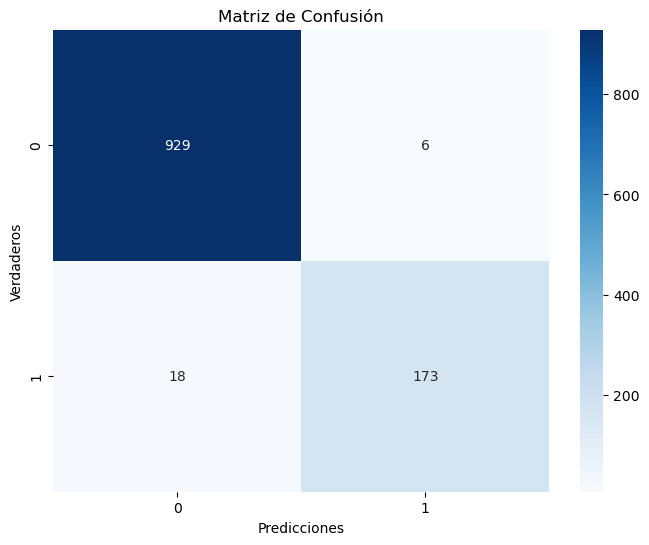

In [29]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train_rm_aux, y_train_rm)

y_pred_rf = rf_model.predict(X_test_aux)
y_pred_rf = np.round(y_pred_rf)
print("Precisión (accuracy) de Regresión Logística:", accuracy_score(y_test, y_pred_rf))
print("recall score de Regresión Logística:", recall_score(y_test, y_pred_rf))
print("precision score de Regresión Logística:", precision_score(y_test, y_pred_rf))
print("f1score de Regresión Logística:", f1_score(y_test, y_pred_rf))
print("roc auc score de Regresión Logística:", roc_auc_score(y_test, y_pred_rf))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True,
            fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

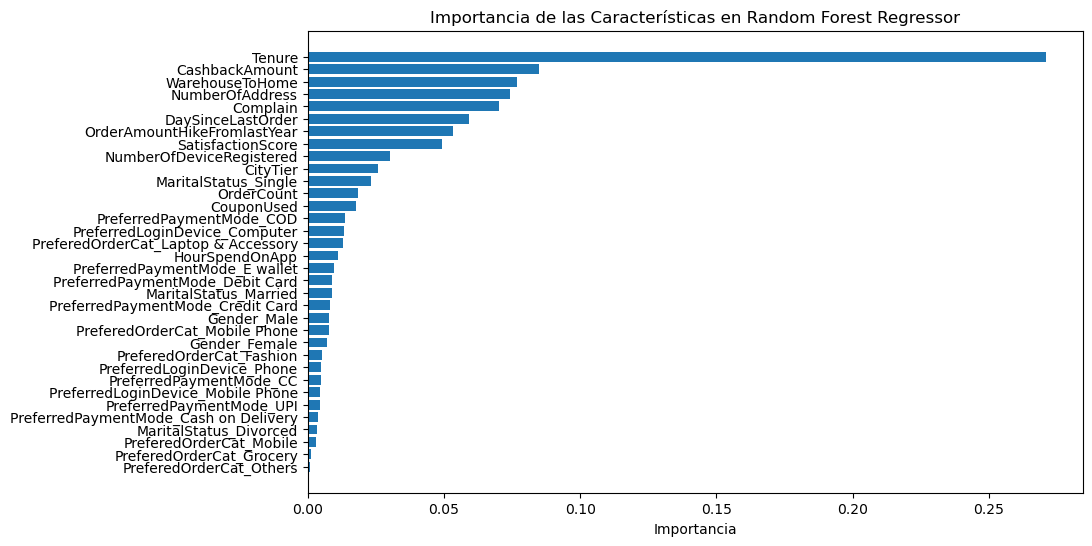

In [30]:
# Sacamos las características
feature_importances = rf_model.feature_importances_

# Ordemos 
fi_sort,col_sort  = zip(*sorted(list(zip(feature_importances,X_train_rm_aux.columns))))

plt.figure(figsize=(10, 6))
plt.barh(list(col_sort), list(fi_sort))
plt.xlabel('Importancia')
plt.title('Importancia de las Características en Random Forest Regressor')
plt.show()

Sacando las características más importantes de podemos que la que tiene más importancia para la predicción del modelo es la variable Tenure, esta variable signficia la antigüedad del cliente, y tiene sentido, ya que la confianza es algo que hace decidir sobre si seguir. De ahí sigue la variable Cashback Amount, WarehouseToHome, NumberOfAddres, que tiene sentido que sean las más importantes.

Si nos vamos a las menos importantes, podemos ver que es PreferedOrderCat, que es donde prefiere iniciar sesión, y tiene sentido porque no es muy el dispositivo, tampoco es relevante su estado civil ni cal es su método de pago.

# Aplicación de otros modelos

## Regresion Logística

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(X_train_rm_aux, y_train_rm)

C:\Users\Dekel Black\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
y_pred = model.predict(X_test_aux)

In [34]:
print("Precisión (accuracy) de Regresión Logística:", accuracy_score(y_test, y_pred))
print("recall score de Regresión Logística:", recall_score(y_test, y_pred))
print("precision score de Regresión Logística:", precision_score(y_test, y_pred))
print("f1score de Regresión Logística:", f1_score(y_test, y_pred))
print("roc auc score de Regresión Logística:", roc_auc_score(y_test, y_pred))

Precisión (accuracy) de Regresión Logística: 0.8872113676731794
recall score de Regresión Logística: 0.5235602094240838
precision score de Regresión Logística: 0.7352941176470589
f1score de Regresión Logística: 0.6116207951070337
roc auc score de Regresión Logística: 0.7425287678136461


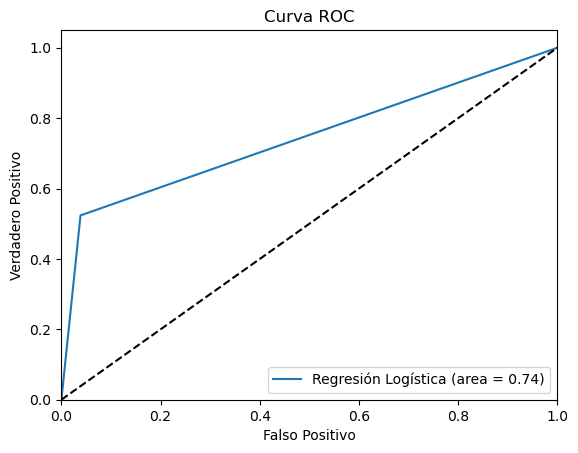

In [35]:
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadero Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

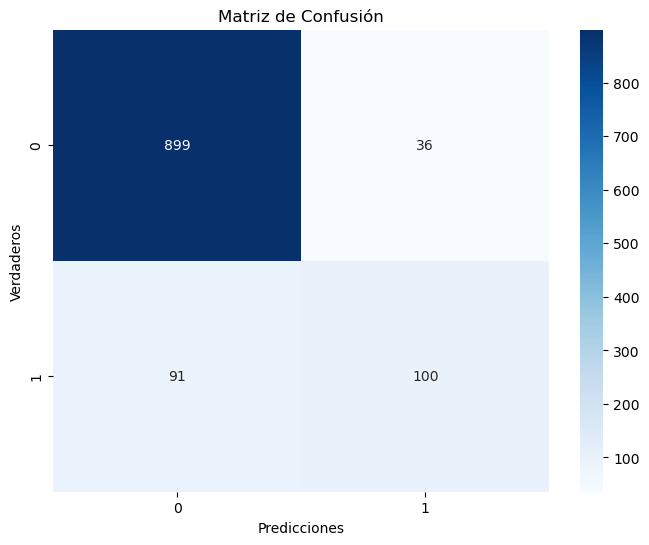

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
            fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

## DecisionTreeRegressor

Precisión (accuracy) de Regresión Logística: 0.9626998223801065
recall score de Regresión Logística: 0.8900523560209425
precision score de Regresión Logística: 0.8900523560209425
f1score de Regresión Logística: 0.8900523560209426
roc auc score de Regresión Logística: 0.933796231486407


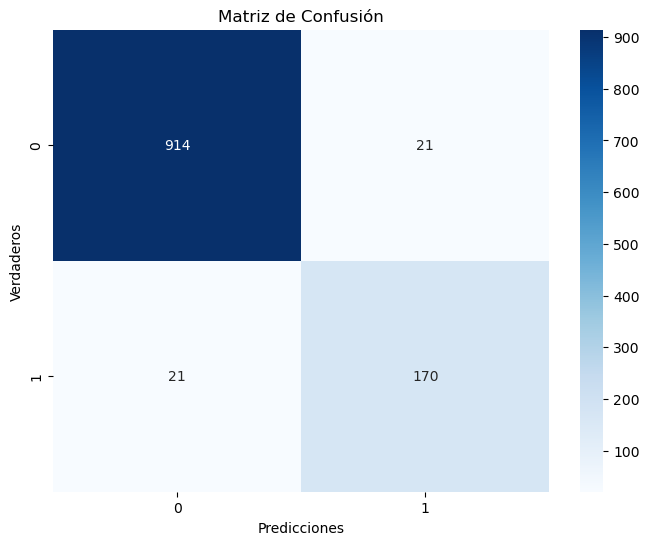

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_rm_aux, y_train_rm)

y_pred_dt = dt_model.predict(X_test_aux)

print("Precisión (accuracy) de Regresión Logística:", accuracy_score(y_test, y_pred_dt))
print("recall score de Regresión Logística:", recall_score(y_test, y_pred_dt))
print("precision score de Regresión Logística:", precision_score(y_test, y_pred_dt))
print("f1score de Regresión Logística:", f1_score(y_test, y_pred_dt))
print("roc auc score de Regresión Logística:", roc_auc_score(y_test, y_pred_dt))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True,
            fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

## GradientBoostingRegressor

Precisión (accuracy) de Regresión Logística: 0.9040852575488455
recall score de Regresión Logística: 0.5654450261780105
precision score de Regresión Logística: 0.8120300751879699
f1score de Regresión Logística: 0.6666666666666666
roc auc score de Regresión Logística: 0.769353529131786


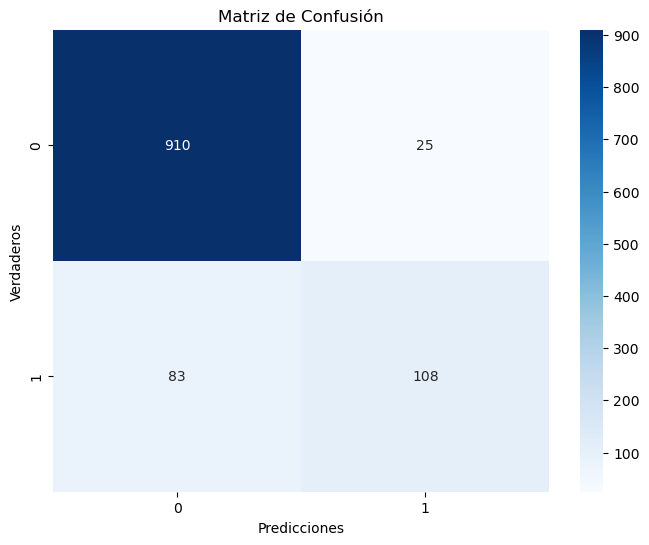

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_rm_aux, y_train_rm)

y_pred_gb = np.round(gb_model.predict(X_test_aux))

print("Precisión (accuracy) de Regresión Logística:", accuracy_score(y_test, y_pred_gb))
print("recall score de Regresión Logística:", recall_score(y_test, y_pred_gb))
print("precision score de Regresión Logística:", precision_score(y_test, y_pred_gb))
print("f1score de Regresión Logística:", f1_score(y_test, y_pred_gb))
print("roc auc score de Regresión Logística:", roc_auc_score(y_test, y_pred_gb))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True,
            fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()